<a href="https://colab.research.google.com/github/SergeiVKalinin/MSE_Fall_2025/blob/main/Module%205/20_Multiarmed_Bandits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tutorial notebook for the Fall 2025 Course "Machine Learning for Materials Science", University of Tennessee Knoxville, Department of Materials Science and Engineering.



https://subscription.packtpub.com/book/data/9781838644147

Mastering Reinforcement Learning with Python
By Enes Bilgin, December 2020

# Multiarmed Bandits

First, let's create a simple Gaussian Bandit, a single slot machine.

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Class for a single slot machine. Rewards are Gaussian.
# Note that we round the winnings down to one significant digit

class GaussianBandit(object):

    def __init__(self, mean=0, stdev=1):
        self.mean = mean
        self.stdev = stdev

    def pull_lever(self):
        reward = np.random.normal(self.mean, self.stdev)
        return np.round(reward, 1)

We can name him Bobby. Bobby is configured to give a reward with mean of 3 and distribution of 1.

In [25]:
bobby = GaussianBandit(10,1)
bobby.pull_lever()

np.float64(11.3)

Now, let's play n_games with Bobby and plot our reward as a function of time and its distribution. Unsurprisingly, the rewards follow Gaussian distribution(if we play enough games).

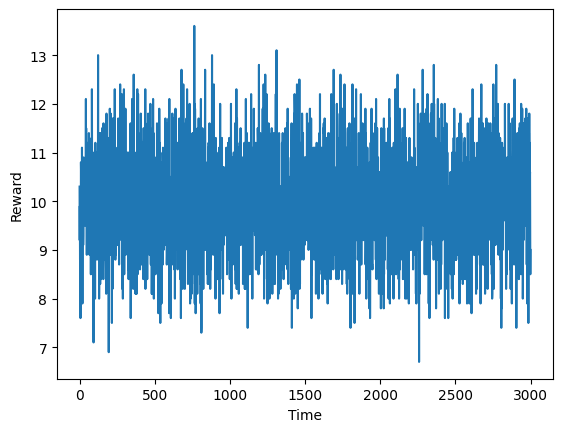

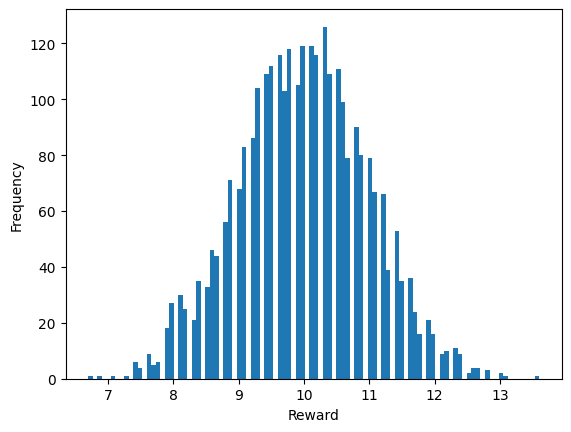

In [26]:
n_games = 3000
rewards = []

for t in range(n_games):
    reward = bobby.pull_lever()
    rewards.append(reward)

# plot reward as a function of time
plt.plot(range(n_games), rewards)
plt.xlabel('Time')
plt.ylabel('Reward')
plt.show()

# provide the histogram of the rewards
plt.hist(rewards, bins = 100)
plt.xlabel('Reward')
plt.ylabel('Frequency')
plt.show()

Now, let's set the Casino. Now we can initialize several slot machines with different reward distribution.

In [27]:
class GaussianBanditGame(object):

    def __init__(self, bandits):
        self.bandits = bandits
        np.random.shuffle(self.bandits)
        self.reset_game()

    def play(self, choice):
        reward = self.bandits[choice - 1].pull_lever()
        self.rewards.append(reward)
        self.total_reward += reward
        self.n_played += 1
        return reward

    def user_play(self):
        self.reset_game()
        print("Game started. " +
              "Enter 0 as input to end the game.")

        while True:
            print(f"\n -- Round {self.n_played}")
            choice = int(input(f"Choose a machine " +
                     f"from 1 to {len(self.bandits)}: "))
            if choice in range(1, len(self.bandits) + 1):
                reward = self.play(choice)
                print(f"Machine {choice} gave " +
                      f"a reward of {reward}.")
                avg_rew = self.total_reward/self.n_played
                print(f"Your average reward " +
                      f"so far is {avg_rew}.")
            else:
                break
        print("Game has ended.")

        if self.n_played > 0:
            print(f"Total reward is {self.total_reward}" +
                  f" after {self.n_played} round(s).")
            avg_rew = self.total_reward/self.n_played
            print(f"Average reward is {avg_rew}.")

    def reset_game(self):
        self.rewards = []
        self.total_reward = 0
        self.n_played = 0

Let's initialize the game with three slot machines, with different reward probabilities.

In [28]:
slotA = GaussianBandit(5, 1)
slotB = GaussianBandit(6, 1)
slotC = GaussianBandit(4, 2)
game = GaussianBanditGame([slotA, slotB, slotC])

Now, let's play the game with the 3 slot machines choosing the played one randomly.

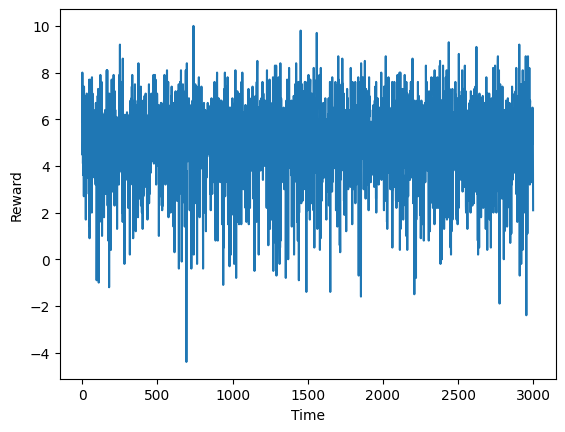

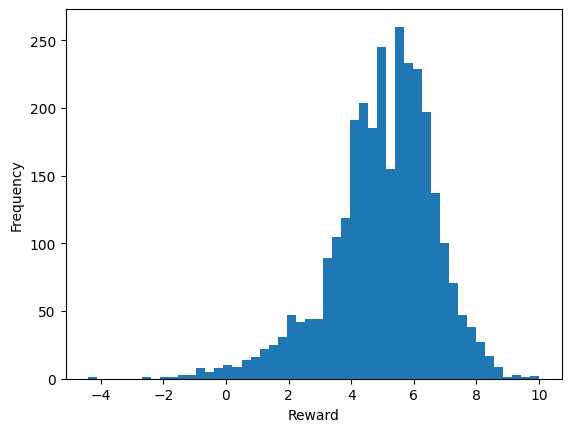

In [29]:
n_games = 3000
rewards = []

for t in range(n_games):
    reward = game.play(np.random.randint(1, 4))
    rewards.append(reward)

# plot reward as a function of time
plt.plot(range(n_games), rewards)
plt.xlabel('Time')
plt.ylabel('Reward')
plt.show()

# provide the histogram of the rewards
plt.hist(rewards, bins = 50)
plt.xlabel('Reward')
plt.ylabel('Frequency')
plt.show()

A/B

## A/B/n testing

Now, let's define a Bernoulli Bandit. In this case, we win 1 with probability p and win 0 with probability 1-p, i.e. Bernoulli distribution. This model can be used to describe the probability of one-off events, e.g. click on the ad on the webpage, or success of polyoxometallate synthesis   

In [30]:
class BernoulliBandit(object):

    def __init__(self, p):
        self.p = p

    def display_ad(self):
        reward = np.random.binomial(n=1, p=self.p)
        return reward

In [31]:
adA = BernoulliBandit(0.004)
adB = BernoulliBandit(0.016)
adC = BernoulliBandit(0.02)
adD = BernoulliBandit(0.028)
adE = BernoulliBandit(0.031)
ads = [adA, adB, adC, adD, adE]

Now, let's split our time for ads as test and production.

In [32]:
n_test = 20000
n_prod = 80000
n_ads = len(ads)

Q = np.zeros(n_ads)  # Q, action values
N = np.zeros(n_ads)  # N, total impressions

total_reward = 0
avg_rewards = []  # Save average rewards over time

for i in range(n_test):
    ad_chosen = np.random.randint(n_ads)
    R = ads[ad_chosen].display_ad() # Observe reward
    N[ad_chosen] += 1
    Q[ad_chosen] += (1 / N[ad_chosen]) * (R - Q[ad_chosen])
    total_reward += R
    avg_reward_so_far = total_reward / (i + 1)
    avg_rewards.append(avg_reward_so_far)

In [33]:
Q, R

(array([0.00448878, 0.01292121, 0.01918286, 0.02755102, 0.03236797]), 0)

In [34]:
best_ad_index = np.argmax(Q)
print("The best performing ad is {}".format(chr(ord('A') + best_ad_index)))

The best performing ad is E


In [35]:
ad_chosen = best_ad_index

for i in range(n_prod):
    R = ads[ad_chosen].display_ad()
    total_reward += R
    avg_reward_so_far = total_reward / (n_test + i + 1)
    avg_rewards.append(avg_reward_so_far)

In [36]:
import pandas as pd
df_reward_comparison = pd.DataFrame(avg_rewards, columns=['A/B/n'])

In [37]:
df_reward_comparison.tail()

,A/B/n
99995,0.028971
99996,0.028971
99997,0.028981
99998,0.028980
99999,0.028980


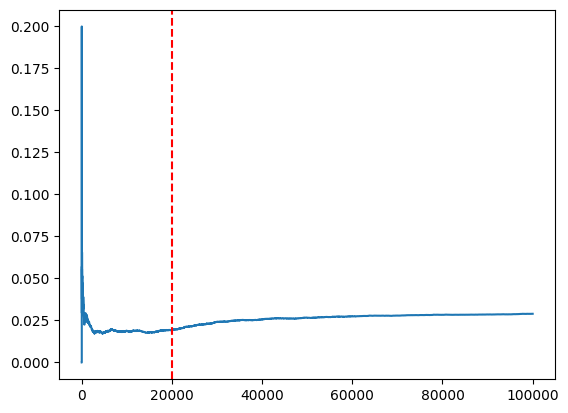

In [38]:
import matplotlib.pyplot as plt

plt.plot(avg_rewards)
plt.axvline(x=n_test, color='r', linestyle='--')
plt.show()

## Epsilon-greedy policy

Now, let's introduce epsilon-greedy policy. Here, epsilon number of times we perform random action, and 1-epsilon number of time swe perform best action. Note that this approach works when number of possible actions is relatively small (eithe rby nature of the problem, or by design).

Note that we are going to compare the epsilon-greedy results with the A/B testing results, so we keep the number of attempts same as for A/B testing. However, we do not have separate test and production stages in this case.

In [39]:
greedy_list = ['e-greedy: 0.01', 'e-greedy: 0.05', 'e-greedy: 0.1', 'e-greedy: 0.5']
greedy_list1 = [0.01, 0.05, 0.1, 0.5]

for eps1 in greedy_list1:

  eps = eps1
  n_prod = 100000
  n_ads = len(ads)
  Q = np.zeros(n_ads)
  N = np.zeros(n_ads)
  total_reward = 0
  avg_rewards = []

  ad_chosen = np.random.randint(n_ads)

  for i in range(n_prod):
    R = ads[ad_chosen].display_ad()
    N[ad_chosen] += 1
    Q[ad_chosen] += (1 / N[ad_chosen]) * (R - Q[ad_chosen])
    total_reward += R
    avg_reward_so_far = total_reward / (i + 1)
    avg_rewards.append(avg_reward_so_far)

    # Select the next ad to display
    if np.random.uniform() <= eps:
        ad_chosen = np.random.randint(n_ads)
    else:
        ad_chosen = np.argmax(Q)

  df_reward_comparison['e-greedy: {}'.format(eps)] = avg_rewards

In [40]:
df_reward_comparison.tail()

,A/B/n,e-greedy: 0.01,e-greedy: 0.05,e-greedy: 0.1,e-greedy: 0.5
99995,0.028971,0.028311,0.029181,0.028691,0.025511
99996,0.028971,0.028311,0.029181,0.028691,0.025511
99997,0.028981,0.028311,0.029181,0.028691,0.025511
99998,0.028980,0.028310,0.029180,0.028690,0.025510
99999,0.028980,0.028310,0.029180,0.028690,0.025510


<Axes: >

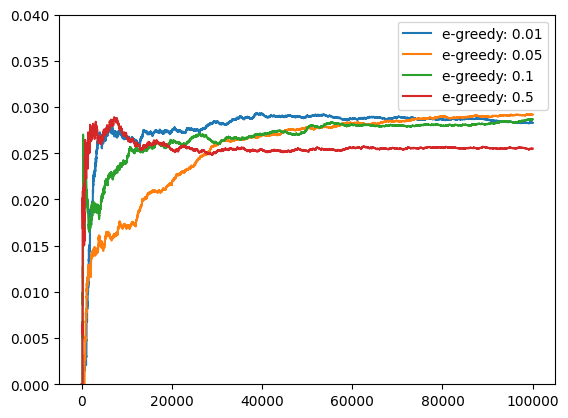

In [41]:
df_reward_comparison[greedy_list].plot(ylim = (0, 0.04))
# df_reward_comparison.plot(ylim = (0, 0.04))

- We can see that if our epsilon is large, our reward converges to lower value (because we keep exploring sub-optimal options).
- If the epsilon is small, then the algorithm learns slower
- For each problem, we find optimal value of epsilon by tuning on simialr data
- Alternatively, we can start with large epsilon value and then make it smaller with time

We can also define ***regret*** as a difference between reward and ideally possible reward.

## Upper Confidence Bound (UCB)

In UCB policy, we associate each choice with uncertainty that changes with the time. The more times we tried some choice, the smaller is the uncertainty. We have a hypoerparameter c that sets the balance between exploration and exploitation.

In [42]:
ucb_list1 = [0.1, 1, 10]

for c1 in ucb_list1:
  c = c1
  n_prod = 100000
  n_ads = len(ads)
  ad_indices = np.array(range(n_ads))
  Q = np.zeros(n_ads)
  N = np.zeros(n_ads)
  total_reward = 0
  avg_rewards = []

  for t in range(1, n_prod + 1):
    if any(N==0):
      ad_chosen = np.random.choice(ad_indices[N==0])
    else:
      uncertainty = np.sqrt(np.log(t) / N)
      ad_chosen = np.argmax(Q + c * uncertainty)

    R = ads[ad_chosen].display_ad()
    N[ad_chosen] += 1
    Q[ad_chosen] += (1 / N[ad_chosen]) * (R - Q[ad_chosen])
    total_reward += R
    avg_reward_so_far = total_reward / t
    avg_rewards.append(avg_reward_so_far)

  df_reward_comparison['UCB, c={}'.format(c)] = avg_rewards

In [43]:
df_reward_comparison.tail()

,A/B/n,e-greedy: 0.01,e-greedy: 0.05,e-greedy: 0.1,e-greedy: 0.5,"UCB, c=0.1","UCB, c=1","UCB, c=10"
99995,0.028971,0.028311,0.029181,0.028691,0.025511,0.030551,0.025501,0.021311
99996,0.028971,0.028311,0.029181,0.028691,0.025511,0.030551,0.025501,0.021311
99997,0.028981,0.028311,0.029181,0.028691,0.025511,0.030551,0.025501,0.021310
99998,0.028980,0.028310,0.029180,0.028690,0.025510,0.030550,0.025500,0.021310
99999,0.028980,0.028310,0.029180,0.028690,0.025510,0.030550,0.025500,0.021310


<Axes: >

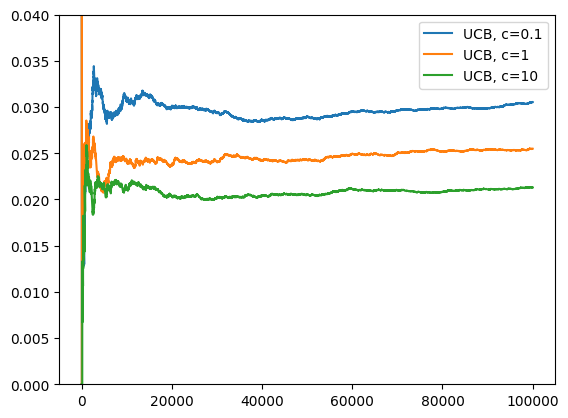

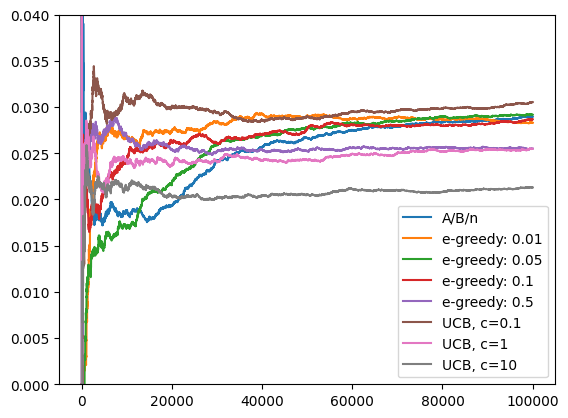

In [44]:
ucb_list = ['UCB, c=0.1', 'UCB, c=1', 'UCB, c=10']
df_reward_comparison[ucb_list].plot(ylim = (0, 0.04))
df_reward_comparison.plot(ylim = (0, 0.04))

## Thompson sampling

In [45]:
n_prod = 100000
n_ads = len(ads)
alphas = np.ones(n_ads)
betas = np.ones(n_ads)
total_reward = 0
avg_rewards = []

for i in range(n_prod):
    theta_samples = [np.random.beta(alphas[k], betas[k]) for k in range(n_ads)]
    ad_chosen = np.argmax(theta_samples)
    R = ads[ad_chosen].display_ad()
    alphas[ad_chosen] += R
    betas[ad_chosen] += 1 - R
    total_reward += R
    avg_reward_so_far = total_reward / (i + 1)
    avg_rewards.append(avg_reward_so_far)
df_reward_comparison['Thompson Sampling'] = avg_rewards

<Axes: >

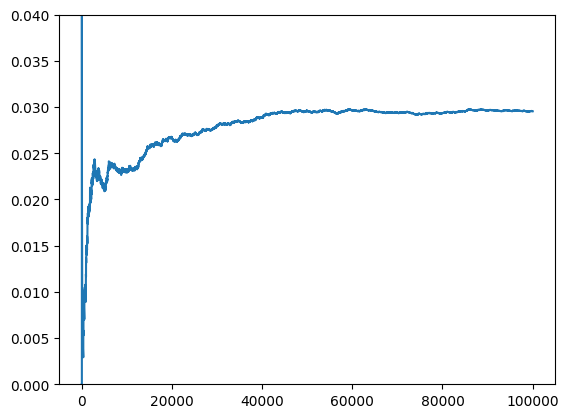

In [46]:
df_reward_comparison['Thompson Sampling'].plot(ylim = (0, 0.04))